In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [4]:
import os
print(os.listdir("C:/Users/Tsenguunn/Documents/Kaggle"))

['100_datasets.pdf', 'concrete_data.csv', 'Concrete_Strength_Prediction_Using_Keras_Tsenguun_Enkhbaatar_2.ipynb', 'gold_price_time_series_monthly.csv', 'home-credit-default-risk', 'home-credit-default-risk.zip', 'house price', 'property-sales', 'property-sales.zip', 'sentiment labelled sentences', 'sentiment-labelled-sentences-data-set (1).zip', 'zara_data_go_2019_all_dataset', 'zara_data_go_2019_all_dataset_A96QYAu7882jqg4z.zip', '^DJI.csv']


In [5]:

filepath_dict = { 'yelp': 'C:/Users/Tsenguunn/Documents/Kaggle/sentiment labelled sentences/yelp_labelled.txt',
                  'amazon': 'C:/Users/Tsenguunn/Documents/Kaggle/sentiment labelled sentences/amazon_cells_labelled.txt',
                  'imdb': 'C:/Users/Tsenguunn/Documents/Kaggle/sentiment labelled sentences/imdb_labelled.txt' }


In [7]:
df_list = []

for source, filepath in filepath_dict.items():
    df = pd.read_csv( filepath, names=['sentences', 'label'], sep='\t' )  
    df['source'] = source
    
    df_list.append(df)
    
    
    

In [10]:
df = pd.concat(df_list)

In [11]:
df.shape

(2748, 3)

<b> Here, I concanate the 3 datasets into one dataset. </b>

In [19]:
df.head()

,sentences,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [20]:
df.tail()

,sentences,label,source
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb
747,All in all its an insult to one's intelligence...,0,imdb


In [22]:
df_yelp = df[df['source'] == 'yelp']
sentences = df_yelp['sentences'].values
y = df_yelp['label'].values

In [23]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

<b> In the following cell, I convert sentences into numerical vectors with integer type. </b>

In [24]:
vectorizer = CountVectorizer()

vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [25]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

<b> First, I employ Logistic Regression from the Sci-kit learn library. We can see that it achieved 79.6% accurace on the validation set. </b>

In [31]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


C:\Users\Tsenguunn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentences'].values
    y = df_source['label'].values
    sentences_train, sentences_test, y_train, y_test = train_test_split( sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


C:\Users\Tsenguunn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tsenguunn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tsenguunn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
input_dim = X_train.shape[1]
input_dim

2505

<b> Below, I build sequantial model with one dense layer. We can see that test accuracy 76.5%. </b>

In [41]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)




Train on 561 samples, validate on 187 samples
Epoch 1/100





561/561 [==============================] - 1s 2ms/step - loss: 0.6980 - acc: 0.5312 - val_loss: 0.6870 - val_acc: 0.6257
Epoch 2/100
561/561 [==============================] - 0s 380us/step - loss: 0.6477 - acc: 0.7754 - val_loss: 0.6668 - val_acc: 0.6952
Epoch 3/100
561/561 [==============================] - 0s 345us/step - loss: 0.5850 - acc: 0.8788 - val_loss: 0.6413 - val_acc: 0.7219
Epoch 4/100
561/561 [==============================] - 0s 281us/step - loss: 0.4935 - acc: 0.9180 - val_loss: 0.6180 - val_acc: 0.7540
Epoch 5/100
561/561 [==============================] - 0s 300us/step - loss: 0.3956 - acc: 0.9590 - val_loss: 0.5701 - val_acc: 0.7754
Epoch 6/100
561/561 [==============================] - 0s 416us/step - loss: 0.3129 - acc: 0.9786 - val_loss: 0.5525 - val_acc: 0.7701
Epoch 7/100
561/561 [==============================] - 0s 236us/step - loss: 0.2513 - acc: 0.9840 - val_loss: 0.5017 - val_acc: 0.7701
Epo

In [44]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7647


In [45]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

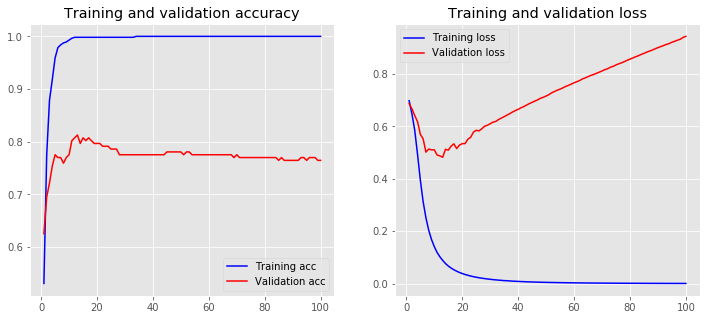

In [46]:
plot_history(history)

<b> Here, I tokenize sentences into as a vector of individual words. </b>

In [48]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  

print(sentences_train[5])
print(X_train[5])

It was that year, however, that reminded us that Huston was still at the top of his game as evinced by his faithful adaptation of James Joyce's acclaimed novella "The Dead.  
[8, 12, 14, 311, 199, 14, 938, 394, 14, 939, 12, 112, 31, 1, 255, 4, 49, 173, 17, 940, 38, 49, 941, 565, 4, 942, 943, 944, 945, 1, 566]


In [49]:
for word in ['the', 'all','fan']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27
fan: 932


In [50]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


<b> Below, I build Deep Learning model with Embedding layer and one Dense layer. And validation set accuracy is 66.3% </b>

In [51]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


Train on 561 samples, validate on 187 samples
Epoch 1/20
561/561 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5169 - val_loss: 0.6932 - val_acc: 0.5080
Epoch 2/20
561/561 [==============================] - 0s 428us/step - loss: 0.6913 - acc: 0.5152 - val_loss: 0.6935 - val_acc: 0.4866
Epoch 3/20
561/561 [==============================] - 0s 423us/step - loss: 0.6833 - acc: 0.5294 - val_loss: 0.6963 - val_acc: 0.4866
Epoch 4/20
561/561 [==============================] - 0s 444us/step - loss: 0.6470 - acc: 0.5294 - val_loss: 0.6855 - val_acc: 0.4866
Epoch 5/20
561/561 [==============================] - 0s 421us/step - loss: 0.4715 - acc: 0.7950 - val_loss: 0.6973 - val_acc: 0.5829
Epoch 6/20
561/561 [==============================] - 0s 526us/step - loss: 0.1530 - acc: 0.9786 - val_loss: 0.6844 - val_acc: 0.6364
Epoch 7/20
561/561 [==============================] - 0s 484us/step - loss: 0.0460 - acc: 0.9947 - val_loss: 0.6788 - val_acc: 0.6203
Epoch 8/20
561/561

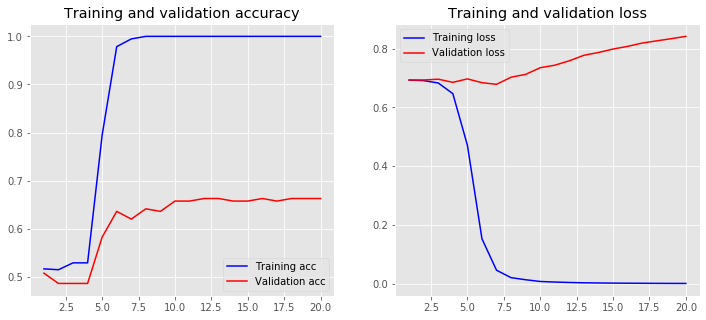

In [52]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

<b> Next, I build the Deep Learning model with Embedding layer, Global Max Pooling layer, and 1 Dense layer. We can see that validation set accuracy improves to 80.2%. </b>

In [53]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8021


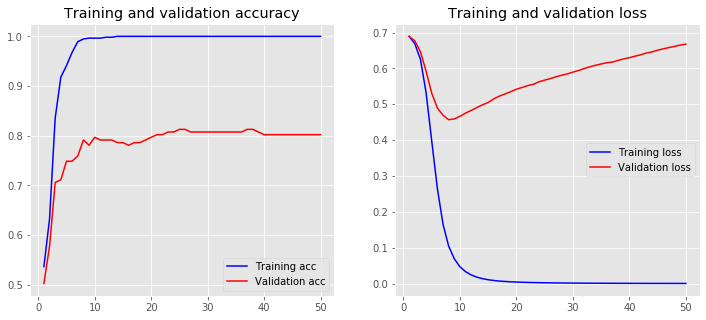

In [54]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [67]:
embedding_dim = 150

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_68 (Embedding)     (None, 100, 150)          690450    
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 96, 128)           96128     
_________________________________________________________________
global_max_pooling1d_67 (Glo (None, 128)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 10)                1290      
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 11        
Total params: 787,879
Trainable params: 787,879
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8021


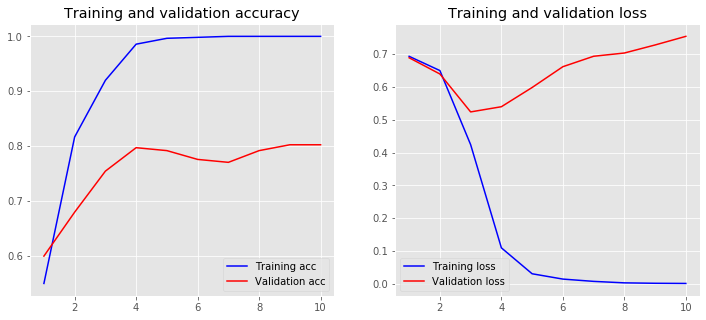

In [59]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

<b> Here, I build the Deep Learning model with Embedding layer, 1D Convolutional layer, Global Max Pooling layer, and one Dense layer. Then, I conduct randomized search over set of parameter values using RandomizedSearchCV tool from the Sci-kit learn library to find the best fitting model for each of three datasets. </b>

In [60]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [61]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [63]:
# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentences'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
#     prompt = input(f'finished {source}; write to file and proceed? [y/n]')
#     if prompt.lower() not in {'y', 'true', 'yes'}:
#         break
#     with open(output_file, 'w+') as f:
    s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        source,
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
#         f.write(output_string)

Running grid search for data set : amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.9min finished


Running amazon data set
Best Accuracy : 0.8200
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8253


Running grid search for data set : imdb
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 13.2min finished


Running imdb data set
Best Accuracy : 0.8156
{'vocab_size': 4603, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy : 0.8428


Running grid search for data set : yelp
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 15.6min finished


Running yelp data set
Best Accuracy : 0.8210
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8472




<b>
    1. The best fitting model for Amazon dataset is the model with 32 convolution filters and kernel size of 3. Achieved accuracy on test dataset is 82.5%.
    <br>
    2. The best fitting model for IMDB dataset is the model with 128 convolution filters and kernel size of 5. Achieved accuracy on test dataset is 84.3%.
    <br>
    3. The best fitting model for Yelp dataset is the model with 32 convolution filters and kernel size of 3. Achieved accuracy on test dataset is 84.7%
    <br>
    <br>
    We can observe that Deep Learning model with Embedding layer, Convolution layer, Global Maxo Pooling layer, and Dense layer performs better than the previous models. Convoluation layers are good at exploring different patterns inside sentences. And Global Max Pooling layer helps erasing the noise in the dataset. Finally, Dense layer can generate the best combination of the patterns derived by the Convolution filters.
    </b>